In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
from keras.models import model_from_json

import random
import matplotlib.pyplot as plt


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
#download the data set from the kaggle  
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Saving kaggle.json to kaggle.json
 98% 597M/612M [00:07<00:00, 44.4MB/s]
100% 612M/612M [00:07<00:00, 87.6MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('gtsrb-german-traffic-sign.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
# set the train and test directory
TRAIN = "Train/"
TEST = "Test/"

In [ ]:
# 0 means folder name
# 1 means find sub folder
# 2 means inside total images
train_ids = next(os.walk(TRAIN))[1]
test_ids = next(os.walk(TEST))[2]
print(test_ids)

['08240.png', '12227.png', '05263.png', '12111.png', '06841.png', '05723.png', '01711.png', '02723.png', '06757.png', '06685.png', '02760.png', '01876.png', '01337.png', '01122.png', '05738.png', '01204.png', '08262.png', '03041.png', '07232.png', '08228.png', '10181.png', '06431.png', '00744.png', '08589.png', '09846.png', '05892.png', '06485.png', '05279.png', '00091.png', '03960.png', '02714.png', '00566.png', '07803.png', '08934.png', '09112.png', '06793.png', '01289.png', '02136.png', '10757.png', '06184.png', '07394.png', '11827.png', '00975.png', '12554.png', '10179.png', '00508.png', '00563.png', '00229.png', '00863.png', '01543.png', '09773.png', '03892.png', '10797.png', '06556.png', '05901.png', '07272.png', '05339.png', '09154.png', '02063.png', '07788.png', '02901.png', '01318.png', '07326.png', '05565.png', '11388.png', '12077.png', '01089.png', '01952.png', '01831.png', '00608.png', '01090.png', '02615.png', '02461.png', '00486.png', '01343.png', '01361.png', '11339.png'

Train/0
Train/1
Train/2
Train/3
Train/4
Train/5
Train/6
Train/7
Train/8
Train/9
Train/10
Train/11
Train/12
Train/13
Train/14
Train/15
Train/16
Train/17
Train/18
Train/19
Train/20
Train/21
Train/22
Train/23
Train/24
Train/25
Train/26
Train/27
Train/28
Train/29
Train/30
Train/31
Train/32
Train/33
Train/34
Train/35
Train/36
Train/37
Train/38
Train/39


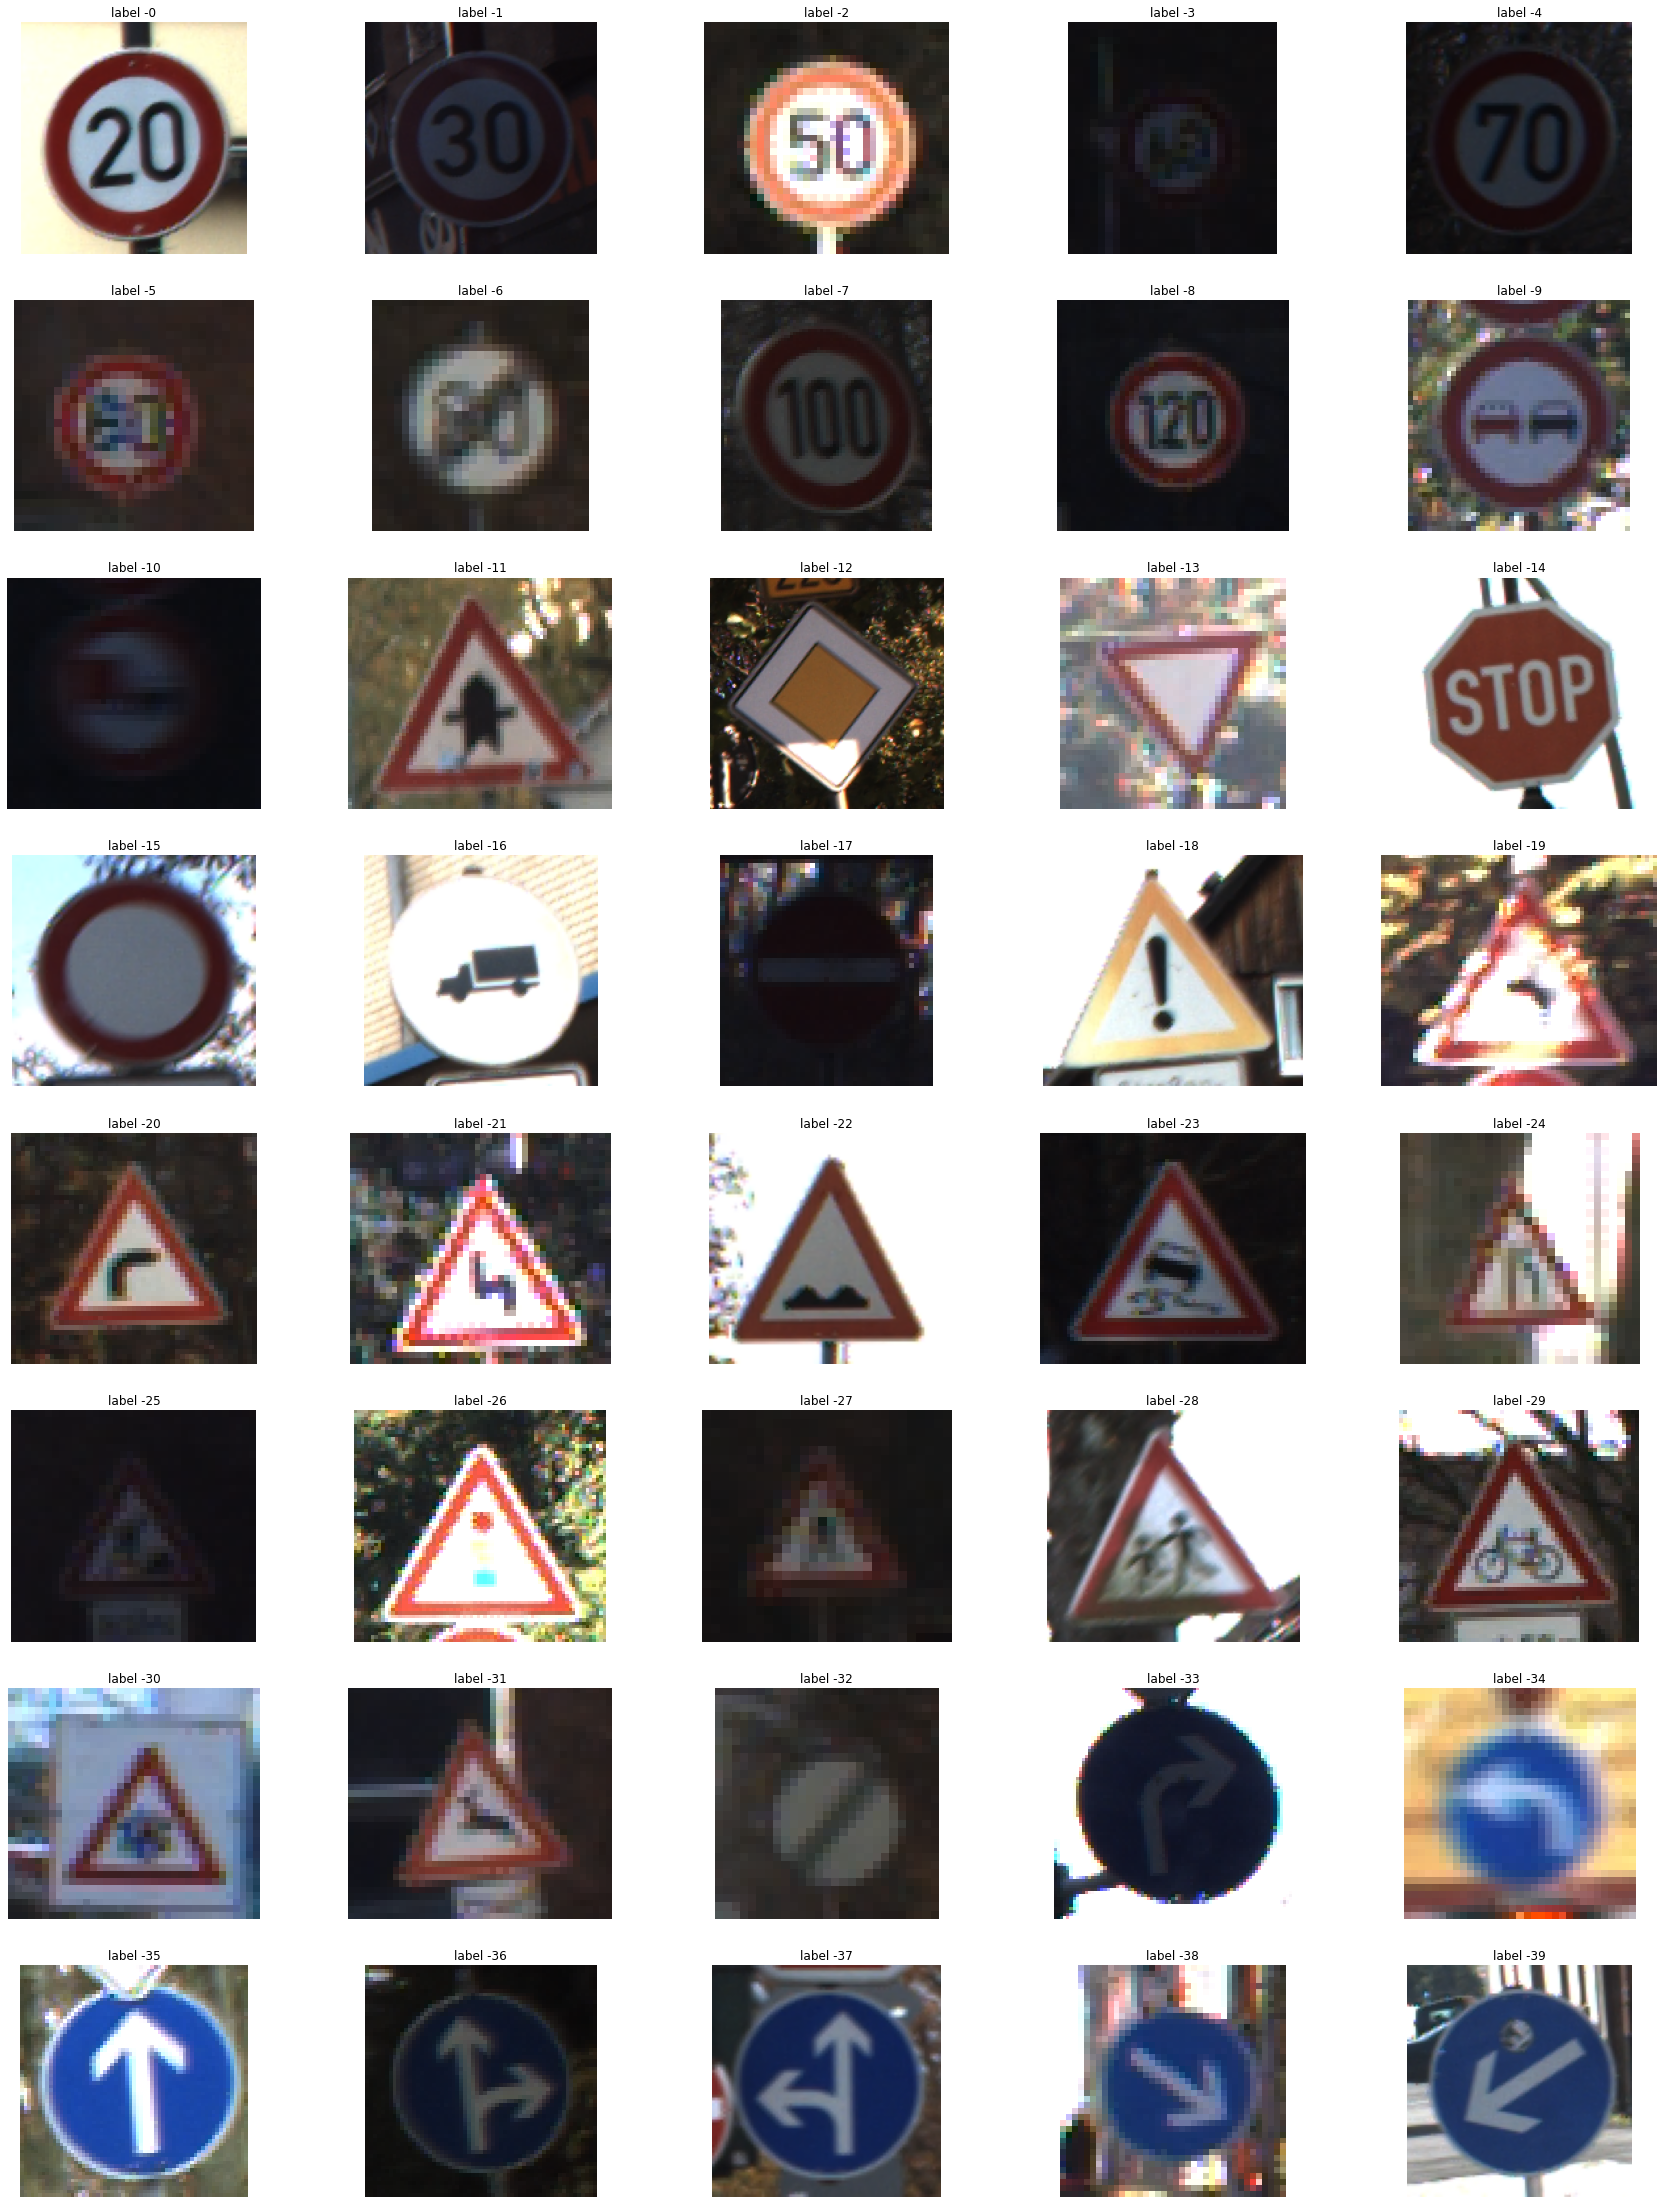

In [ ]:
# Now, let's plot the data
plt.figure(figsize=(30,40))
for i in range(40):
    path  = TRAIN +str(i)
    print(path)
    image = random.choice(os.listdir(path))
    plt.subplot(8,5,i+1)
    img = plt.imread(os.path.join(path,image))
    plt.imshow(img)
    plt.axis('off')
    plt.title('label -{}'.format(i))


In [ ]:
sum = 0
for i in train_ids:
    
    path  = TRAIN +str(i)
    sum = sum + len(os.listdir(path))
length = sum   
print(length)


39209


In [ ]:
IMG_WIDTH = 30
IMG_HEIGHT = 30
IMG_CHANNELS = 3

In [ ]:
# now preprose the image
X_train = np.zeros((length,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.float16)
y_train = np.zeros((length,43),dtype=np.float16)

In [ ]:
i = 0
for n,id in tqdm(enumerate(train_ids),total = len(train_ids)):
  for j in os.listdir(TRAIN+id):
    path = TRAIN + id
    image = imread(path+'/'+j)[:,:,:IMG_CHANNELS]
    img = resize(image,(IMG_HEIGHT,IMG_WIDTH))
  
    X_train[i] = img
    y_train[i][int(id)] = 1
    i = i+1




100%|██████████| 43/43 [01:49<00:00,  2.55s/it]


## train test spliting

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(
...     X_train, y_train, test_size=0.3, random_state=42)

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
Input_shape = (30,30,3)
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=Input_shape))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

### Training

In [ ]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_tr, y_tr, batch_size=32, epochs=epochs,
validation_data=(X_te, y_te))



Epoch 1/20
858/858 [==============================] - 86s 101ms/step - loss: 1.3854 - accuracy: 0.5991 - val_loss: 0.1852 - val_accuracy: 0.9521
Epoch 2/20
858/858 [==============================] - 88s 103ms/step - loss: 0.2422 - accuracy: 0.9251 - val_loss: 0.0636 - val_accuracy: 0.9837
Epoch 3/20
858/858 [==============================] - 92s 107ms/step - loss: 0.1432 - accuracy: 0.9567 - val_loss: 0.0400 - val_accuracy: 0.9908
Epoch 4/20
858/858 [==============================] - 87s 101ms/step - loss: 0.1019 - accuracy: 0.9688 - val_loss: 0.0335 - val_accuracy: 0.9910
Epoch 5/20
858/858 [==============================] - 87s 102ms/step - loss: 0.0725 - accuracy: 0.9773 - val_loss: 0.0323 - val_accuracy: 0.9896
Epoch 6/20
858/858 [==============================] - 87s 102ms/step - loss: 0.0738 - accuracy: 0.9774 - val_loss: 0.0249 - val_accuracy: 0.9934
Epoch 7/20
858/858 [==============================] - 86s 101ms/step - loss: 0.0609 - accuracy: 0.9819 - val_loss: 0.0187 - val_ac

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
test_ids = next(os.walk(TEST))[2]
print(len(test_ids))

12631


In [ ]:
def testdata(nb_example):
  
  x_test = np.zeros((nb_example,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS))
  y = []
  for i in range(nb_example):
      j  = np.random.choice(os.listdir('Test/'))
      image = imread('Test/'+j)[:,:,:IMG_CHANNELS]

      img = resize(image,(IMG_HEIGHT,IMG_WIDTH))
      x_test[i] = img
      y.append(j)
      i +=1
  return x_test,y

In [ ]:
def gen_random_batch(nb_examples):
  x_test = np.zeros((nb_examples,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS))
  y_test = np.zeros((nb_examples,43))
  for i in range(nb_examples):
      group_idx = np.random.choice(train_ids)
      print(group_idx)
      path = TRAIN +str(group_idx)
      j = random.choice(os.listdir(path))
      image = imread(path+'/'+j)[:,:,:IMG_CHANNELS]

      img = resize(image,(IMG_HEIGHT,IMG_WIDTH))
      x_test[i] = img
      y_test[i][int(group_idx)] = 1
  return x_test,y_test
  


In [ ]:
label = {0:"20 speed limit",
1:"30 speed limit",
2:"50 speed limit",
3:"60 speed limit",4:"70 speed limit",
5:"80 speed limit",
6:"90 speed limit",
7:"100 speed limit",
8:"120 speed limit",
9:"No Passing Sign",
10:"No passing for truks in excees of 3.5 tons authorized weight",
11:"Rigth of Way",
12:"Priority Road",
13:"Yeild Right Of Way",
14:"Stop",
15:"Prohibited For All vehicles",
16:"Trators an trucks with an authorised loaded weight of more than 3.5 tuns prohibited",
17:"entry prohibited",
18:"danger",
19:"Single curve left",
20:"Single curve right",
21:"Double curve left",
22:"rough road",
23:"Slippery road",
24:"road narrows",25:"construction site",
26:"singnal lights ahead",
27:"pedesreain crosswalk ahead",
28:"children",
29:"biycle crossing",
30:" Noane",
31:"	wild animale crossing",
32:"	end of restriction",
33:"	mandatory direction of travel",
34:" noneq",
35:"	mandatory direction of travel",
36:"	mandatory direction of travel",
37:" nonq " ,
38:" nosa",
39:"	mandatory direction of travel",
40:"	traffic circle ",
41:"	end of no passing zone",
42:"	end of no passing zone"
}

In [ ]:
def show_model_output_train(nb_examples = 3):
  pv_a,pv_sim = gen_random_batch(nb_examples)
  pread_sim = loaded_model.predict(pv_a)
  prediction = np.argmax(pread_sim,axis=1)
  true = np.argmax(pv_sim,axis=1)
  print(prediction)
  pred = [label[p] for p in prediction]
  print(pred)
  
  fig, m_axs = plt.subplots(pv_a.shape[0],1,figsize = (4, 4*nb_examples))
  i=0
  for ax1 in m_axs:
        ax1.imshow(pv_a[i,:,:,:])
        ax1.set_title(pred[i])
        ax1.axis('off')
        i +=1

  return fig

In [ ]:
def show_model_output_test(nb_examples = 3):
  pv_a ,y= testdata(nb_examples)
  pread_sim = loaded_model.predict(pv_a)
  pred = np.argmax(pread_sim,axis=1)
  pred = [label[p] for p in pred]
  fig, m_axs = plt.subplots(pv_a.shape[0],1,figsize = (6, 5*nb_examples))
  i=0
  for ax1 in m_axs:
        ax1.imshow(pv_a[i,:,:,:])
        ax1.set_title('Image prediction:{0}'.format(prediction[i]))
        ax1.axis('off')
        i +=1

  return fig

### TRAINING

18
15
10
42
22
16
23
19
11
0
[18 15 10 42 22 16 23 19 11  0]
['danger', 'Prohibited For All vehicles', 'No passing for truks in excees of 3.5 tons authorized weight', '\tend of no passing zone', 'rough road', 'Trators an trucks with an authorised loaded weight of more than 3.5 tuns prohibited', 'Slippery road', 'Single curve left', 'Rigth of Way', '20 speed limit']


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


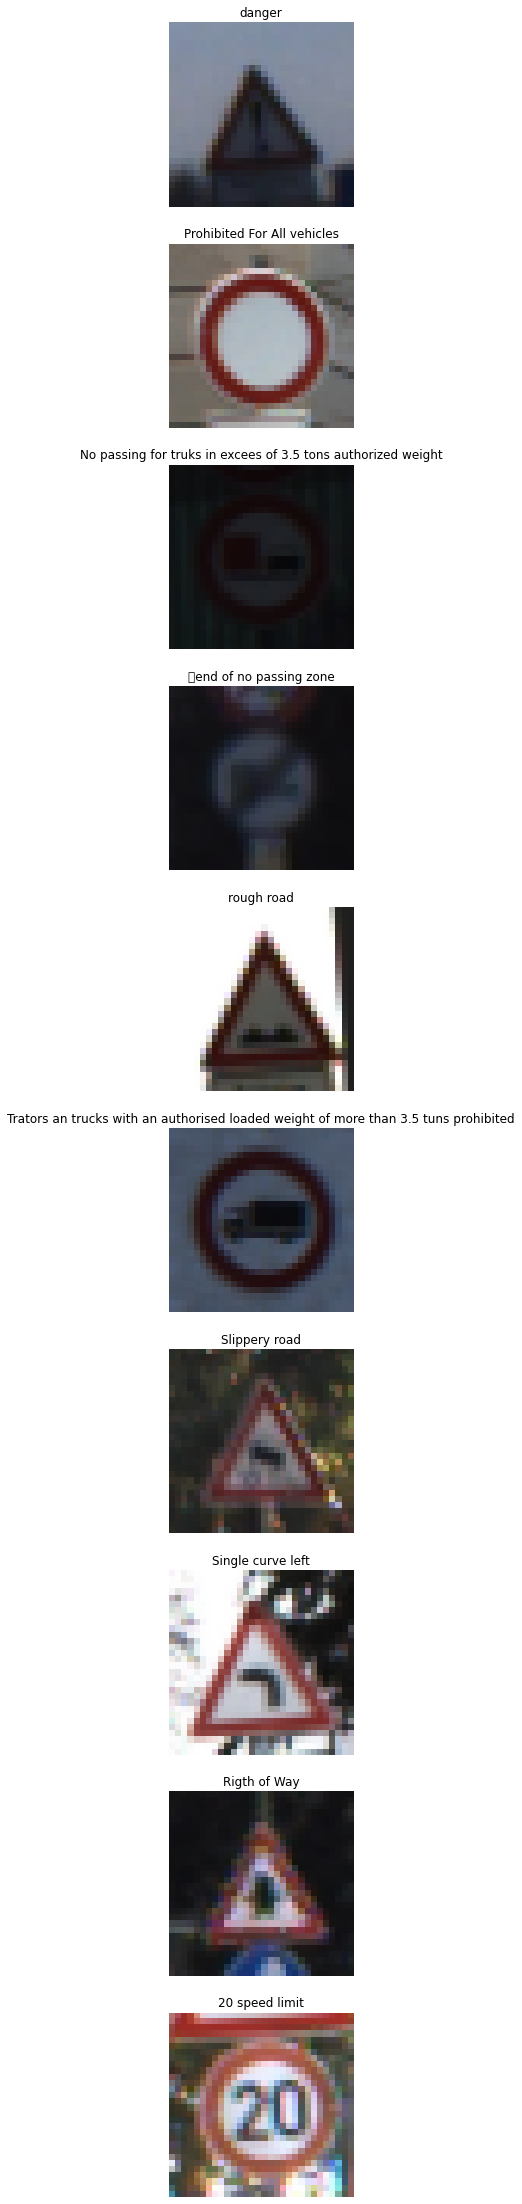

In [ ]:
_ = show_model_output_train(10)

### TEST DATA 

In [ ]:
  pv_a,y= testdata(1200)
  pread_sim = loaded_model.predict(pv_a)
  prediction = np.argmax(pread_sim,axis=1)

In [ ]:
data =[]
for i in range(1200):
  dt =[]
  dt.append(y[i])
  dt.append(prediction[i])
  data.append(dt)


In [ ]:
!pip install tabletext
import tabletext


print(tabletext.to_text(data))

  Created wheel for tabletext: filename=tabletext-0.1-cp36-none-any.whl size=6023 sha256=c60b3bd697fcff7a1ba3bf9e342eaf30fb044e469cfe5553e19820547dcc8241
  Stored in directory: /root/.cache/pip/wheels/63/15/d8/897b137f43975c4f5f49139be65fee6dbeab6a3f88c1838f66
Successfully built tabletext
┌───────────┬────┐
│ 09576.png │ 13 │
├───────────┼────┤
│ 09910.png │ 13 │
├───────────┼────┤
│ 02246.png │  5 │
├───────────┼────┤
│ 11256.png │ 17 │
├───────────┼────┤
│ 00381.png │ 13 │
├───────────┼────┤
│ 05020.png │ 28 │
├───────────┼────┤
│ 08906.png │ 11 │
├───────────┼────┤
│ 08904.png │  2 │
├───────────┼────┤
│ 09372.png │ 33 │
├───────────┼────┤
│ 05962.png │ 16 │
├───────────┼────┤
│ 03725.png │ 11 │
├───────────┼────┤
│ 07288.png │  5 │
├───────────┼────┤
│ 05857.png │ 38 │
├───────────┼────┤
│ 09121.png │  4 │
├───────────┼────┤
│ 09255.png │ 18 │
├───────────┼────┤
│ 04740.png │ 13 │
├───────────┼────┤
│ 05659.png │ 40 │
├───────────┼────┤
│ 07110.png │  3 │
├───────────┼────┤
│ 08241